In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

def print_correlation():
    features = ['Fed Rate', 'Volume', 'CPI', 'CPI_pct', 'DXY', 'SPX','SPDR', 't']
    columns = []
    for x in features:
        row = []
        for y in features:
            correlation = raw[x].corr(raw[y])
            row.append(correlation)
        columns.append(row)
    df = pd.DataFrame(columns, columns=[f'{j}' for j in features], index=[f'{i}' for i in features])
    print(df)
    
pd.set_option('display.expand_frame_repr', False) 
raw = pd.read_excel('raw.xlsx')
raw['CPI_pct'] = raw['CPI'].pct_change() * 100
print_correlation()


          Fed Rate    Volume       CPI   CPI_pct       DXY       SPX      SPDR         t
Fed Rate  1.000000 -0.333437 -0.025623  0.003272  0.091343 -0.378869  0.178138  0.028444
Volume   -0.333437  1.000000  0.246238 -0.003218  0.116853  0.330506  0.038589 -0.089960
CPI      -0.025623  0.246238  1.000000  0.023378  0.940845  0.808285  0.741500 -0.020892
CPI_pct   0.003272 -0.003218  0.023378  1.000000  0.029043  0.010104  0.010948 -0.126389
DXY       0.091343  0.116853  0.940845  0.029043  1.000000  0.669973  0.756568  0.032001
SPX      -0.378869  0.330506  0.808285  0.010104  0.669973  1.000000  0.349039  0.011661
SPDR      0.178138  0.038589  0.741500  0.010948  0.756568  0.349039  1.000000  0.024820
t         0.028444 -0.089960 -0.020892 -0.126389  0.032001  0.011661  0.024820  1.000000


          Fed Rate    Volume       CPI   CPI_pct       DXY       SPX      SPDR         t
Fed Rate  1.000000 -0.333437 -0.025623  0.003272  0.091343 -0.378869  0.178138  0.028444
Volume   -0.333437  1.000000  0.246238 -0.003218  0.116853  0.330506  0.038589 -0.089960
CPI      -0.025623  0.246238  1.000000  0.023378  0.940845  0.808285  0.741500 -0.020892
CPI_pct   0.003272 -0.003218  0.023378  1.000000  0.029043  0.010104  0.010948 -0.126389
DXY       0.091343  0.116853  0.940845  0.029043  1.000000  0.669973  0.756568  0.032001
SPX      -0.378869  0.330506  0.808285  0.010104  0.669973  1.000000  0.349039  0.011661
SPDR      0.178138  0.038589  0.741500  0.010948  0.756568  0.349039  1.000000  0.024820
t         0.028444 -0.089960 -0.020892 -0.126389  0.032001  0.011661  0.024820  1.000000


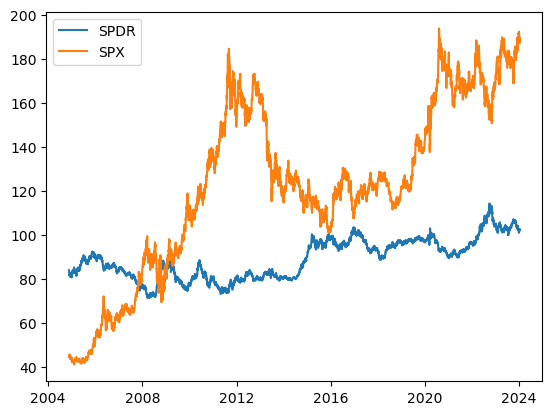

In [31]:
# Perform inflation adjustment
# raw['SPDR'] = raw['SPDR']/raw['CPI']
# raw['SPX'] = raw['SPX']/raw['CPI']

plt.plot(raw['Date'], raw['SPDR'], label='SPDR')
plt.plot(raw['Date'], raw['SPX'], label='SPX')
plt.legend()
print_correlation()

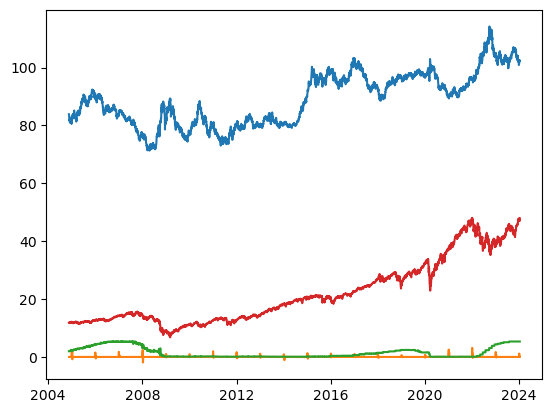

In [32]:
# Plot time

plt.plot(raw['Date'], raw['SPDR'], label='SPDR')
plt.plot(raw['Date'], raw['CPI_pct'], label='CPI')
plt.plot(raw['Date'], raw['Fed Rate'], label='Fed Rate')
plt.plot(raw['Date'], raw['DXY']/100, label='DXY')


In [33]:
raw.to_excel('decorrelated.xlsx') 

In [34]:
print(raw)

           Date  Fed Rate      Volume      CPI        SPDR  SPDR_Close          DXY         SPX   t  CPI_pct
0    2004-11-19      1.99  1526600000  190.300   83.870003   83.309998  1183.550049   44.490002  11      NaN
1    2004-11-22      2.01  1392700000  190.300   83.269997   83.190002  1170.339966   44.750000  11      0.0
2    2004-11-23      2.00  1428300000  190.300   83.169998   82.970001  1177.239990   44.880001  11      0.0
3    2004-11-24      2.02  1149600000  190.300   82.900002   82.410004  1176.939941   44.930000  11      0.0
4    2004-11-26      2.01   504580000  190.300   81.779999   81.779999  1181.760010   45.250000  11      0.0
...         ...       ...         ...      ...         ...         ...          ...         ...  ..      ...
4813 2024-01-05      5.33  3844370000  312.332  102.400002  102.410004  4690.569824  189.679993   1      0.0
4814 2024-01-08      5.33  3742320000  312.332  102.440002  102.209999  4703.700195  187.210007   1      0.0
4815 2024-01-09    